# From Biological to Artificial Neurons
## The Perceptron

In [1]:
import numpy as np
from sklearn.datasets import load_iris
from sklearn.linear_model import Perceptron

iris = load_iris()
X = iris.data[:, (2, 3)] # petal length, petal width
y = (iris.target == 0).astype(np.int)

per_clf = Perceptron()
per_clf.fit(X, y)

y_pred = per_clf.predict([[2, 0.5]])
y_pred

array([0])

# Implementing MLPs with Keras
## Building an Image Classifier Using the Sequential API
### Using Keras to load the dataset

In [2]:
import tensorflow as tf
from tensorflow import keras

In [3]:
fashion_mnist = keras.datasets.fashion_mnist
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data()

In [4]:
X_train_full.shape

(60000, 28, 28)

In [5]:
X_train_full.dtype

dtype('uint8')

In [6]:
X_valid, X_train = X_train_full[:5000] / 255.0, X_train_full[5000:] / 255.0
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
               "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

### Creating the model using the Sequential API

In [7]:
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[28,28]))
model.add(keras.layers.Dense(300, activation="relu"))
model.add(keras.layers.Dense(100, activation="relu"))
model.add(keras.layers.Dense(10, activation="softmax"))

In [8]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28,28]),
    keras.layers.Dense(300, activation="relu"),
    keras.layers.Dense(100, activation="relu"),
    keras.layers.Dense(10, activation="softmax")
])

In [9]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 300)               235500    
_________________________________________________________________
dense_4 (Dense)              (None, 100)               30100     
_________________________________________________________________
dense_5 (Dense)              (None, 10)                1010      
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


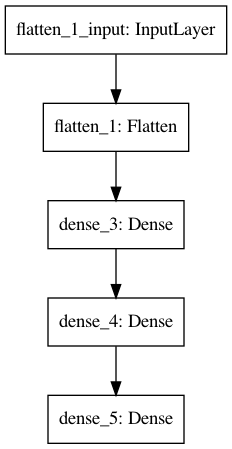

In [10]:
keras.utils.plot_model(model)

In [11]:
model.layers

In [12]:
hidden1 = model.layers[1]
hidden1.name

'dense_3'

In [13]:
model.get_layer('dense_3') is hidden1

True

In [14]:
weights, biases = hidden1.get_weights()
weights

array([[-0.07311648,  0.03447104,  0.03536419, ...,  0.02846805,
        -0.01388432, -0.03356417],
       [-0.04091261, -0.07359773, -0.00236671, ..., -0.02071773,
         0.02042521, -0.04325434],
       [-0.05832158,  0.02746458, -0.02757958, ...,  0.0525877 ,
         0.06660613, -0.0471393 ],
       ...,
       [ 0.03007432,  0.01341814,  0.01204354, ...,  0.04801724,
         0.01689798,  0.03989404],
       [ 0.00350211,  0.01365651,  0.05771536, ..., -0.00510857,
        -0.02979991, -0.05162753],
       [ 0.05499597, -0.05607253,  0.06029162, ..., -0.02002712,
         0.00863086, -0.05700781]], dtype=float32)

In [15]:
weights.shape

(784, 300)

In [16]:
biases

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

In [17]:
biases.shape

(300,)

Note that Dense layer initialized connection weights randomly (required to break symmetry) and biases to zeros. Can use ```kernel_initializer``` and ```bias_initializer``` to tweak these.

### Compiling the model

In [18]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer="sgd",
              metrics=["accuracy"])

### Training and evaluating the model

In [19]:
history = model.fit(X_train, y_train, epochs=30,
                    validation_data=(X_valid, y_valid))

Epoch 1/30
1719/1719 [==============================] - 6s 3ms/step - loss: 0.7112 - accuracy: 0.7661 - val_loss: 0.5294 - val_accuracy: 0.8186
Epoch 2/30
1719/1719 [==============================] - 8s 4ms/step - loss: 0.4881 - accuracy: 0.8302 - val_loss: 0.4503 - val_accuracy: 0.8458
Epoch 3/30
1719/1719 [==============================] - 8s 4ms/step - loss: 0.4430 - accuracy: 0.8443 - val_loss: 0.4204 - val_accuracy: 0.8520
Epoch 4/30
1719/1719 [==============================] - 9s 5ms/step - loss: 0.4137 - accuracy: 0.8546 - val_loss: 0.3966 - val_accuracy: 0.8654
Epoch 5/30
1719/1719 [==============================] - 8s 5ms/step - loss: 0.3939 - accuracy: 0.8608 - val_loss: 0.3785 - val_accuracy: 0.8698
Epoch 6/30
1719/1719 [==============================] - 7s 4ms/step - loss: 0.3774 - accuracy: 0.8671 - val_loss: 0.3904 - val_accuracy: 0.8638
Epoch 7/30
1719/1719 [==============================] - 7s 4ms/step - loss: 0.3631 - accuracy: 0.8714 - val_loss: 0.3603 - val_accuracy:

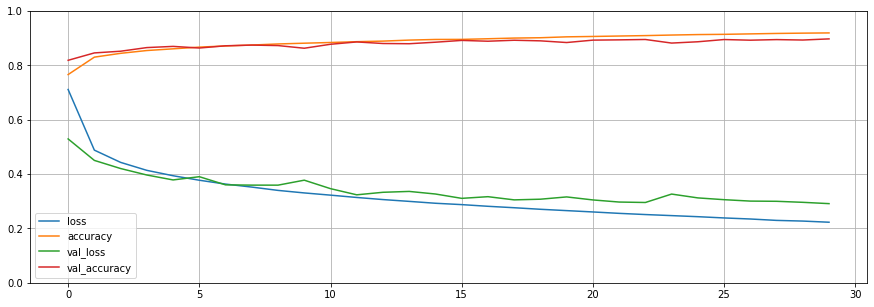

In [20]:
import pandas as pd
import matplotlib.pyplot as plt

pd.DataFrame(history.history).plot(figsize=(15, 5))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show()

looking good! training and validation accuracy steadily increase while training and validation loss decrease. validation curves are also close to training curves, indicating that overfitting doesn't look like a concern.

In [21]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 69.8053 - accuracy: 0.8373


[69.8053207397461, 0.8373000025749207]

### Using the model to make predictions

In [22]:
X_new = X_test[:3]
y_proba = model.predict(X_new)
y_proba.round(2)

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

In [23]:
y_pred = model.predict_classes(X_new)
y_pred

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).


array([9, 2, 1])

In [24]:
np.array(class_names)[y_pred]

array(['Ankle boot', 'Pullover', 'Trouser'], dtype='<U11')

In [25]:
y_new = y_test[:3]
y_new

array([9, 2, 1], dtype=uint8)

## Building a Regression MLP Using the Sequential API

In [26]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

housing = fetch_california_housing()
X_train_full, X_test, y_train_full, y_test = train_test_split(
    housing.data, housing.target)
X_train, X_valid, y_train, y_valid = train_test_split(
    X_train_full, y_train_full)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_valid = scaler.transform(X_valid)
X_test = scaler.transform(X_test)

In [27]:
model = keras.models.Sequential([
    keras.layers.Dense(30, activation="relu", input_shape=X_train.shape[1:]),
    keras.layers.Dense(1)
])
model.compile(loss="mean_squared_error", optimizer="sgd")
history = model.fit(X_train, y_train, epochs=20,
                    validation_data=(X_valid, y_valid))

Epoch 1/20
363/363 [==============================] - 1s 1ms/step - loss: 0.8937 - val_loss: 0.5778
Epoch 2/20
363/363 [==============================] - 0s 1ms/step - loss: 0.4849 - val_loss: 0.5303
Epoch 3/20
363/363 [==============================] - 0s 1ms/step - loss: 0.4559 - val_loss: 0.5053
Epoch 4/20
363/363 [==============================] - 0s 1ms/step - loss: 0.4382 - val_loss: 0.5060
Epoch 5/20
363/363 [==============================] - 0s 1ms/step - loss: 0.4330 - val_loss: 0.5211
Epoch 6/20
363/363 [==============================] - 0s 1ms/step - loss: 0.4222 - val_loss: 0.4773
Epoch 7/20
363/363 [==============================] - 0s 1ms/step - loss: 0.4164 - val_loss: 0.4657
Epoch 8/20
363/363 [==============================] - 0s 1ms/step - loss: 0.4206 - val_loss: 0.4735
Epoch 9/20
363/363 [==============================] - 0s 1ms/step - loss: 0.4065 - val_loss: 0.4547
Epoch 10/20
363/363 [==============================] - 0s 1ms/step - loss: 0.4040 - val_loss: 0.4492

In [28]:
mse_test = model.evaluate(X_test, y_test)
X_new = X_test[:3] # "pretending" these are new instances
y_pred = model.predict(X_new)

162/162 [==============================] - 0s 752us/step - loss: 0.3825


## Building Complex Models Using the Functional API

In [29]:
# wide and deep
input_ = keras.layers.Input(shape=X_train.shape[1:])
hidden1 = keras.layers.Dense(30, activation="relu")(input_)
hidden2 = keras.layers.Dense(30, activation="relu")(hidden1)
concat = keras.layers.Concatenate()([input_, hidden2])
output = keras.layers.Dense(1)(concat)
model = keras.Model(inputs=[input_], outputs=[output])

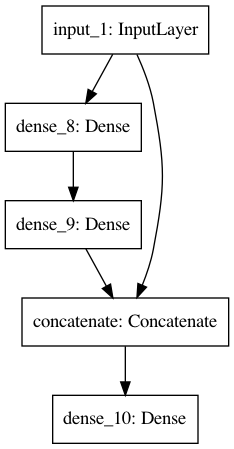

In [30]:
keras.utils.plot_model(model)

can also send a subset of features through wide and another subset through deep, like below

In [31]:
input_A = keras.layers.Input(shape=[5], name="wide_input")
input_B = keras.layers.Input(shape=[6], name="deep_input")
hidden1 = keras.layers.Dense(30, activation="relu")(input_B)
hidden2 = keras.layers.Dense(30, activation="relu")(hidden1)
concat = keras.layers.concatenate([input_A, hidden2])
output = keras.layers.Dense(1, name="output")(concat)
model = keras.Model(inputs=[input_A, input_B], outputs=[output])

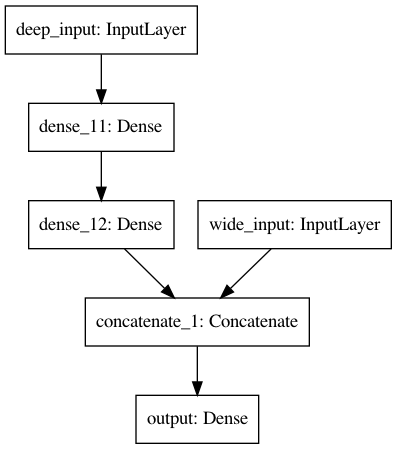

In [32]:
keras.utils.plot_model(model)

In [33]:
model.compile(loss="mse", optimizer=keras.optimizers.SGD(lr=1e-3))

X_train_A, X_train_B = X_train[:, :5], X_train[:, 2:]
X_valid_A, X_valid_B = X_valid[:, :5], X_valid[:, 2:]
X_test_A, X_test_B = X_test[:, :5], X_test[:, 2:]
X_new_A, X_new_B = X_test_A[:3], X_test_B[:3]

history = model.fit((X_train_A, X_train_B), y_train, epochs=20,
                    validation_data=((X_valid_A, X_valid_B), y_valid))
mse_test = model.evaluate((X_test_A, X_test_B), y_test)
y_pred = model.predict((X_new_A, X_new_B))

Epoch 1/20
363/363 [==============================] - 1s 1ms/step - loss: 2.3431 - val_loss: 1.0787
Epoch 2/20
363/363 [==============================] - 0s 1ms/step - loss: 0.8921 - val_loss: 0.8433
Epoch 3/20
363/363 [==============================] - 0s 1ms/step - loss: 0.7509 - val_loss: 0.7662
Epoch 4/20
363/363 [==============================] - 0s 1ms/step - loss: 0.6878 - val_loss: 0.7193
Epoch 5/20
363/363 [==============================] - 0s 1ms/step - loss: 0.6472 - val_loss: 0.6873
Epoch 6/20
363/363 [==============================] - 0s 1ms/step - loss: 0.6173 - val_loss: 0.6622
Epoch 7/20
363/363 [==============================] - 0s 1ms/step - loss: 0.5939 - val_loss: 0.6428
Epoch 8/20
363/363 [==============================] - 1s 2ms/step - loss: 0.5752 - val_loss: 0.6268
Epoch 9/20
363/363 [==============================] - 1s 2ms/step - loss: 0.5599 - val_loss: 0.6151
Epoch 10/20
363/363 [==============================] - 1s 2ms/step - loss: 0.5479 - val_loss: 0.6033

add extra outputs!

In [34]:
input_A = keras.layers.Input(shape=[5], name="wide_input")
input_B = keras.layers.Input(shape=[6], name="deep_input")
hidden1 = keras.layers.Dense(30, activation="relu")(input_B)
hidden2 = keras.layers.Dense(30, activation="relu")(hidden1)
concat = keras.layers.concatenate([input_A, hidden2])
output = keras.layers.Dense(1, name="main_output")(concat)
aux_output = keras.layers.Dense(1, name="aux_output")(hidden2)
model = keras.Model(inputs=[input_A, input_B], outputs=[output, aux_output])

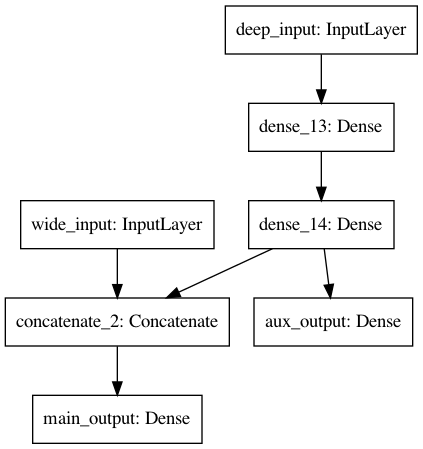

In [35]:
keras.utils.plot_model(model)

each output needs its own loss function

In [36]:
model.compile(loss=["mse", "mse"], loss_weights=[0.9, 0.1], optimizer="sgd")
history = model.fit(
    [X_train_A, X_train_B], [y_train, y_train], epochs=20,
    validation_data=([X_valid_A, X_valid_B], [y_valid, y_valid]))

Epoch 1/20
363/363 [==============================] - 1s 3ms/step - loss: 0.9355 - main_output_loss: 0.8515 - aux_output_loss: 1.6915 - val_loss: 0.6652 - val_main_output_loss: 0.5956 - val_aux_output_loss: 1.2916
Epoch 2/20
363/363 [==============================] - 1s 3ms/step - loss: 0.5674 - main_output_loss: 0.5071 - aux_output_loss: 1.1094 - val_loss: 0.6025 - val_main_output_loss: 0.5513 - val_aux_output_loss: 1.0633
Epoch 3/20
363/363 [==============================] - 1s 2ms/step - loss: 0.5239 - main_output_loss: 0.4782 - aux_output_loss: 0.9355 - val_loss: 0.5647 - val_main_output_loss: 0.5265 - val_aux_output_loss: 0.9080
Epoch 4/20
363/363 [==============================] - 1s 2ms/step - loss: 0.4990 - main_output_loss: 0.4630 - aux_output_loss: 0.8231 - val_loss: 0.5439 - val_main_output_loss: 0.5136 - val_aux_output_loss: 0.8174
Epoch 5/20
363/363 [==============================] - 1s 2ms/step - loss: 0.4829 - main_output_loss: 0.4529 - aux_output_loss: 0.7529 - val_loss

In [37]:
total_loss, main_loss, aux_loss = model.evaluate(
    [X_test_A, X_test_B], [y_test, y_test])

162/162 [==============================] - 0s 1ms/step - loss: 0.3877 - main_output_loss: 0.3761 - aux_output_loss: 0.4925


In [38]:
y_pred_main, y_pred_aux = model.predict([X_new_A, X_new_B])

## Using the Subclassing API to Build Dynamic Models

In [39]:
class WideAndDeepModel(keras.Model):
    def __init__(self, units=30, activation="relu", **kwargs):
        super().__init__(**kwargs) # for standard args like name
        self.hidden1 = keras.layers.Dense(units, activation=activation)
        self.hidden2 = keras.layers.Dense(units, activation=activation)
        self.main_output = keras.layers.Dense(1)
        self.aux_output = keras.layers.Dense(1)
    
    def call(self, inputs):
        input_A, input_B = inputs
        hidden1 = self.hidden1(input_B)
        hidden2 = self.hidden2(hidden1)
        concat = keras.layers.concatenate([input_A, hidden2])
        main_output = self.main_output(concat)
        aux_output = self.aux_output(hidden2)
        return main_output, aux_output

model = WideAndDeepModel()

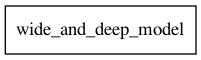

In [40]:
keras.utils.plot_model(model)

notice that using the subclassing API makes it so that keras can't see as many details about the model so easily! in the next section, we learn to save and restore a model; note that this does not work with the subclassing API. however, subclassing can make it easy to do many things within the call method (loops, etc.), so this is the tradeoff we have.

## Saving and Restoring a Model

In [41]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

housing = fetch_california_housing()
X_train_full, X_test, y_train_full, y_test = train_test_split(
    housing.data, housing.target)
X_train, X_valid, y_train, y_valid = train_test_split(
    X_train_full, y_train_full)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_valid = scaler.transform(X_valid)
X_test = scaler.transform(X_test)

model = keras.models.Sequential([
    keras.layers.Dense(30, activation="relu", input_shape=X_train.shape[1:]),
    keras.layers.Dense(1)
])
model.compile(loss="mean_squared_error", optimizer="sgd")
history = model.fit(X_train, y_train, epochs=20,
                    validation_data=(X_valid, y_valid))

Epoch 1/20
363/363 [==============================] - 0s 1ms/step - loss: 0.9578 - val_loss: 0.5298
Epoch 2/20
363/363 [==============================] - 0s 1ms/step - loss: 0.5480 - val_loss: 0.4559
Epoch 3/20
363/363 [==============================] - 0s 1ms/step - loss: 0.4901 - val_loss: 0.4382
Epoch 4/20
363/363 [==============================] - 0s 1ms/step - loss: 0.4812 - val_loss: 0.4277
Epoch 5/20
363/363 [==============================] - 0s 1ms/step - loss: 0.4586 - val_loss: 0.4176
Epoch 6/20
363/363 [==============================] - 0s 1ms/step - loss: 0.4490 - val_loss: 0.4199
Epoch 7/20
363/363 [==============================] - 0s 1ms/step - loss: 0.4432 - val_loss: 0.4123
Epoch 8/20
363/363 [==============================] - 0s 1ms/step - loss: 0.4469 - val_loss: 0.4042
Epoch 9/20
363/363 [==============================] - 1s 1ms/step - loss: 0.4422 - val_loss: 0.4030
Epoch 10/20
363/363 [==============================] - 0s 1ms/step - loss: 0.4239 - val_loss: 0.4020

In [42]:
model.save("my_keras_model.h5")

In [43]:
loaded_model = keras.models.load_model("my_keras_model.h5")
loaded_model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_19 (Dense)             (None, 30)                270       
_________________________________________________________________
dense_20 (Dense)             (None, 1)                 31        
Total params: 301
Trainable params: 301
Non-trainable params: 0
_________________________________________________________________


## Using Callbacks
Objects that keras will call at the start and end of training, the start and end of epochs, before/after processing a batch.

In [44]:
checkpoint_cb = keras.callbacks.ModelCheckpoint("my_keras_model.h5")
history = model.fit(X_train, y_train, epochs=10, callbacks=[checkpoint_cb])

Epoch 1/10
363/363 [==============================] - 0s 953us/step - loss: 0.3780
Epoch 2/10
363/363 [==============================] - 0s 965us/step - loss: 0.3836
Epoch 3/10
363/363 [==============================] - 0s 988us/step - loss: 0.4047
Epoch 4/10
363/363 [==============================] - 0s 1ms/step - loss: 0.3775
Epoch 5/10
363/363 [==============================] - 0s 1ms/step - loss: 0.3870
Epoch 6/10
363/363 [==============================] - 0s 1ms/step - loss: 0.3711
Epoch 7/10
363/363 [==============================] - 0s 1ms/step - loss: 0.3724
Epoch 8/10
363/363 [==============================] - 0s 997us/step - loss: 0.3677
Epoch 9/10
363/363 [==============================] - 0s 1ms/step - loss: 0.3662
Epoch 10/10
363/363 [==============================] - 0s 970us/step - loss: 0.3713


Can also use callbacks as an easy way to implement early stopping!

In [45]:
checkpoint_cb = keras.callbacks.ModelCheckpoint("my_keras_model.h5",
                                                save_best_only=True)
history = model.fit(X_train, y_train, epochs=10,
                    validation_data=(X_valid, y_valid),
                    callbacks=[checkpoint_cb])
model = keras.models.load_model("my_keras_model.h5") # roll back to the best model!

Epoch 1/10
363/363 [==============================] - 0s 1ms/step - loss: 0.3964 - val_loss: 0.3582
Epoch 2/10
363/363 [==============================] - 0s 1ms/step - loss: 0.3717 - val_loss: 0.3514
Epoch 3/10
363/363 [==============================] - 0s 1ms/step - loss: 0.3658 - val_loss: 0.3599
Epoch 4/10
363/363 [==============================] - 0s 1ms/step - loss: 0.3616 - val_loss: 0.3474
Epoch 5/10
363/363 [==============================] - 0s 1ms/step - loss: 0.3615 - val_loss: 0.3509
Epoch 6/10
363/363 [==============================] - 0s 1ms/step - loss: 0.3581 - val_loss: 0.3507
Epoch 7/10
363/363 [==============================] - 0s 1ms/step - loss: 0.3699 - val_loss: 0.3451
Epoch 8/10
363/363 [==============================] - 1s 1ms/step - loss: 0.3555 - val_loss: 0.3636
Epoch 9/10
363/363 [==============================] - 1s 2ms/step - loss: 0.3783 - val_loss: 0.3565
Epoch 10/10
363/363 [==============================] - 1s 2ms/step - loss: 0.3577 - val_loss: 0.3561

Can also directly use the ```EarlyStopping``` callback

In [46]:
early_stopping_cb = keras.callbacks.EarlyStopping(patience=10,
                                                  restore_best_weights=True)
history = model.fit(X_train, y_train, epochs=100,
                    validation_data=(X_valid, y_valid),
                    callbacks=[checkpoint_cb, early_stopping_cb])

Epoch 1/100
363/363 [==============================] - 1s 2ms/step - loss: 0.3560 - val_loss: 0.3485
Epoch 2/100
363/363 [==============================] - 0s 1ms/step - loss: 0.4289 - val_loss: 0.3862
Epoch 3/100
363/363 [==============================] - 1s 2ms/step - loss: 0.3881 - val_loss: 0.3683
Epoch 4/100
363/363 [==============================] - 1s 1ms/step - loss: 0.3757 - val_loss: 0.3565
Epoch 5/100
363/363 [==============================] - 1s 2ms/step - loss: 0.3600 - val_loss: 0.3514
Epoch 6/100
363/363 [==============================] - 1s 2ms/step - loss: 0.3550 - val_loss: 0.3606
Epoch 7/100
363/363 [==============================] - 1s 2ms/step - loss: 0.3527 - val_loss: 0.3457
Epoch 8/100
363/363 [==============================] - 1s 1ms/step - loss: 0.3504 - val_loss: 0.3638
Epoch 9/100
363/363 [==============================] - 0s 1ms/step - loss: 0.3614 - val_loss: 0.3440
Epoch 10/100
363/363 [==============================] - 1s 2ms/step - loss: 0.3476 - val_lo

can also write custom callbacks! these can be useful for debugging (e.g. on_train_begin(), on_epoch_end() etc.)

In [47]:
class PrintValTrainRatioCallback(keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs):
        print("\nval/train: {:.2f}".format(logs["val_loss"] / logs["loss"]))

## Using TensorBoard for Visualization

In [48]:
import os
root_logdir = os.path.join(os.curdir, "my_logs")

def get_run_logdir():
    import time
    run_id = time.strftime("run_%Y_%m_%d-%H_%M_%S")
    return os.path.join(root_logdir, run_id)

run_logdir = get_run_logdir()

In [49]:
tensorboard_cb = keras.callbacks.TensorBoard(run_logdir)
history = model.fit(X_train, y_train, epochs=30,
                    validation_data=(X_valid, y_valid),
                    callbacks=[tensorboard_cb])

Epoch 1/30
  1/363 [..............................] - ETA: 0s - loss: 0.4426WARNING:tensorflow:From /Users/ericfiegel/GitHub/ml-geron/env/lib/python3.7/site-packages/tensorflow/python/ops/summary_ops_v2.py:1277: stop (from tensorflow.python.eager.profiler) is deprecated and will be removed after 2020-07-01.
Instructions for updating:
use `tf.profiler.experimental.stop` instead.
363/363 [==============================] - 1s 2ms/step - loss: 0.3426 - val_loss: 0.3342
Epoch 2/30
363/363 [==============================] - 1s 1ms/step - loss: 0.3341 - val_loss: 0.3418
Epoch 3/30
363/363 [==============================] - 1s 2ms/step - loss: 0.3349 - val_loss: 0.3385
Epoch 4/30
363/363 [==============================] - 1s 1ms/step - loss: 0.3410 - val_loss: 0.3367
Epoch 5/30
363/363 [==============================] - 0s 1ms/step - loss: 0.3348 - val_loss: 0.3346
Epoch 6/30
363/363 [==============================] - 0s 1ms/step - loss: 0.3600 - val_loss: 0.3566
Epoch 7/30
363/363 [==========

In [50]:
# can run this from the command line or from right here in jupyter!
# %load_ext tensorboard
# %tensorboard --logdir=./my_logs --port=6006

# Fine-Tuning Neural Network Hyperparameters
Wrap model definition so that we can use it with sklearn

In [51]:
def build_model(n_hidden=1, n_neurons=30, learning_rate=3e-3, input_shape=[8]):
    model = keras.models.Sequential()
    model.add(keras.layers.InputLayer(input_shape=input_shape))
    for layer in range(n_hidden):
        model.add(keras.layers.Dense(n_neurons, activation="relu"))
    model.add(keras.layers.Dense(1))
    optimizer = keras.optimizers.SGD(lr=learning_rate)
    model.compile(loss="mse", optimizer=optimizer)
    return model

In [52]:
keras_reg = keras.wrappers.scikit_learn.KerasRegressor(build_model)

In [53]:
keras_reg.fit(X_train, y_train, epochs=100,
              validation_data=(X_valid, y_valid),
              callbacks=[keras.callbacks.EarlyStopping(patience=10)])
mse_test = keras_reg.score(X_test, y_test)
y_pred = keras_reg.predict(X_new)

Epoch 1/100
363/363 [==============================] - 1s 3ms/step - loss: 1.1341 - val_loss: 0.6526
Epoch 2/100
363/363 [==============================] - 1s 3ms/step - loss: 0.6578 - val_loss: 0.5510
Epoch 3/100
363/363 [==============================] - 1s 2ms/step - loss: 0.5782 - val_loss: 0.4941
Epoch 4/100
363/363 [==============================] - 1s 2ms/step - loss: 0.5322 - val_loss: 0.4651
Epoch 5/100
363/363 [==============================] - 1s 2ms/step - loss: 0.5079 - val_loss: 0.4503
Epoch 6/100
363/363 [==============================] - 1s 2ms/step - loss: 0.4912 - val_loss: 0.4366
Epoch 7/100
363/363 [==============================] - 1s 2ms/step - loss: 0.4797 - val_loss: 0.4320
Epoch 8/100
363/363 [==============================] - 1s 2ms/step - loss: 0.4733 - val_loss: 0.4233
Epoch 9/100
363/363 [==============================] - 1s 2ms/step - loss: 0.4652 - val_loss: 0.4189
Epoch 10/100
363/363 [==============================] - 1s 2ms/step - loss: 0.4643 - val_lo

363/363 [==============================] - 0s 1ms/step - loss: 0.3601 - val_loss: 0.3443
Epoch 82/100
363/363 [==============================] - 0s 1ms/step - loss: 0.3590 - val_loss: 0.3448
Epoch 83/100
363/363 [==============================] - 0s 1ms/step - loss: 0.3586 - val_loss: 0.3466
Epoch 84/100
363/363 [==============================] - 0s 1ms/step - loss: 0.3580 - val_loss: 0.3506
Epoch 85/100
363/363 [==============================] - 0s 1ms/step - loss: 0.3581 - val_loss: 0.3465
Epoch 86/100
363/363 [==============================] - 0s 1ms/step - loss: 0.3575 - val_loss: 0.3437
Epoch 87/100
363/363 [==============================] - 0s 1ms/step - loss: 0.3651 - val_loss: 0.3430
Epoch 88/100
363/363 [==============================] - 0s 1ms/step - loss: 0.3585 - val_loss: 0.3456
Epoch 89/100
363/363 [==============================] - 0s 1ms/step - loss: 0.3559 - val_loss: 0.3460
Epoch 90/100
363/363 [==============================] - 0s 1ms/step - loss: 0.3567 - val_loss: 

In [54]:
from scipy.stats import reciprocal
from sklearn.model_selection import RandomizedSearchCV

# param_distribs = {
#     "n_hidden": [0, 1, 2, 3],
#     "n_neurons": np.arange(1, 100),
#     "learning_rate": reciprocal(3e-4, 3e-2),
# }

param_distribs = {
    "n_hidden": [1, 3],
    "n_neurons": np.arange(1, 10),
    "learning_rate": reciprocal(3e-4, 3e-2),
}

rnd_search_cv = RandomizedSearchCV(keras_reg, param_distribs, n_iter=10, cv=3, verbose=1)
# rnd_search_cv.fit(X_train, y_train, epochs=100,
rnd_search_cv.fit(X_train, y_train, epochs=10,
                  validation_data=(X_valid, y_valid),
                  callbacks=[keras.callbacks.EarlyStopping(patience=10)])

Fitting 3 folds for each of 10 candidates, totalling 30 fits
Epoch 1/10


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


242/242 [==============================] - 0s 2ms/step - loss: 0.8915 - val_loss: 0.5315
Epoch 2/10
242/242 [==============================] - 0s 1ms/step - loss: 0.5381 - val_loss: 0.4921
Epoch 3/10
242/242 [==============================] - 0s 1ms/step - loss: 0.5007 - val_loss: 0.4697
Epoch 4/10
242/242 [==============================] - 0s 1ms/step - loss: 0.4866 - val_loss: 0.4922
Epoch 5/10
242/242 [==============================] - 0s 1ms/step - loss: 0.4758 - val_loss: 0.4321
Epoch 6/10
242/242 [==============================] - 0s 1ms/step - loss: 0.4677 - val_loss: 0.4256
Epoch 7/10
242/242 [==============================] - 0s 1ms/step - loss: 0.4621 - val_loss: 0.4617
Epoch 8/10
242/242 [==============================] - 0s 1ms/step - loss: 0.4643 - val_loss: 0.4173
Epoch 9/10
242/242 [==============================] - 0s 1ms/step - loss: 0.4523 - val_loss: 0.4113
Epoch 10/10
121/121 [==============================] - 0s 756us/step - loss: 0.4746
Epoch 1/10
242/242 [=======

Epoch 8/10
242/242 [==============================] - 0s 1ms/step - loss: 0.5570 - val_loss: 0.4923
Epoch 9/10
242/242 [==============================] - 0s 1ms/step - loss: 0.5424 - val_loss: 0.4811
Epoch 10/10
121/121 [==============================] - 0s 726us/step - loss: 0.5096
Epoch 1/10
242/242 [==============================] - 0s 2ms/step - loss: 2.0417 - val_loss: 1.1535
Epoch 2/10
242/242 [==============================] - 0s 1ms/step - loss: 0.9875 - val_loss: 0.7453
Epoch 3/10
242/242 [==============================] - 0s 1ms/step - loss: 0.7050 - val_loss: 0.6012
Epoch 4/10
242/242 [==============================] - 0s 1ms/step - loss: 0.6178 - val_loss: 0.5471
Epoch 5/10
242/242 [==============================] - 0s 1ms/step - loss: 0.5777 - val_loss: 0.5148
Epoch 6/10
242/242 [==============================] - 0s 1ms/step - loss: 0.5528 - val_loss: 0.4950
Epoch 7/10
242/242 [==============================] - 0s 1ms/step - loss: 0.5351 - val_loss: 0.4802
Epoch 8/10
242/2

242/242 [==============================] - 0s 1ms/step - loss: 0.6873 - val_loss: 0.6356
Epoch 5/10
242/242 [==============================] - 0s 1ms/step - loss: 0.6599 - val_loss: 0.6109
Epoch 6/10
242/242 [==============================] - 0s 1ms/step - loss: 0.6392 - val_loss: 0.5903
Epoch 7/10
242/242 [==============================] - 0s 1ms/step - loss: 0.6200 - val_loss: 0.5710
Epoch 8/10
242/242 [==============================] - 0s 1ms/step - loss: 0.6018 - val_loss: 0.5531
Epoch 9/10
242/242 [==============================] - 0s 2ms/step - loss: 0.5848 - val_loss: 0.5379
Epoch 10/10
121/121 [==============================] - 0s 792us/step - loss: 0.5980
Epoch 1/10
242/242 [==============================] - 1s 3ms/step - loss: 1.7391 - val_loss: 0.7445
Epoch 2/10
242/242 [==============================] - 0s 2ms/step - loss: 0.6769 - val_loss: 0.5630
Epoch 3/10
242/242 [==============================] - 1s 3ms/step - loss: 0.5875 - val_loss: 0.5113
Epoch 4/10
242/242 [=======

121/121 [==============================] - 0s 1ms/step - loss: 0.3997
Epoch 1/10
242/242 [==============================] - 1s 3ms/step - loss: 1.1998 - val_loss: 0.5824
Epoch 2/10
242/242 [==============================] - 1s 2ms/step - loss: 0.5968 - val_loss: 0.4621
Epoch 3/10
242/242 [==============================] - 0s 2ms/step - loss: 0.4803 - val_loss: 0.4200
Epoch 4/10
242/242 [==============================] - 0s 2ms/step - loss: 0.4497 - val_loss: 0.4062
Epoch 5/10
242/242 [==============================] - 0s 2ms/step - loss: 0.4378 - val_loss: 0.3910
Epoch 6/10
242/242 [==============================] - 0s 2ms/step - loss: 0.4357 - val_loss: 0.4046
Epoch 7/10
242/242 [==============================] - 0s 1ms/step - loss: 0.4279 - val_loss: 0.3878
Epoch 8/10
242/242 [==============================] - 0s 2ms/step - loss: 0.4148 - val_loss: 0.3831
Epoch 9/10
242/242 [==============================] - 0s 1ms/step - loss: 0.4118 - val_loss: 0.3827
Epoch 10/10
121/121 [=========

[Parallel(n_jobs=1)]: Done  30 out of  30 | elapsed:  3.2min finished


Epoch 1/10
363/363 [==============================] - 1s 2ms/step - loss: 0.8669 - val_loss: 0.5847
Epoch 2/10
363/363 [==============================] - 0s 1ms/step - loss: 0.5501 - val_loss: 0.4502
Epoch 3/10
363/363 [==============================] - 1s 2ms/step - loss: 0.4826 - val_loss: 0.4299
Epoch 4/10
363/363 [==============================] - 1s 2ms/step - loss: 0.4610 - val_loss: 0.4131
Epoch 5/10
363/363 [==============================] - 1s 3ms/step - loss: 0.4490 - val_loss: 0.4087
Epoch 6/10
363/363 [==============================] - 2s 4ms/step - loss: 0.4375 - val_loss: 0.4038
Epoch 7/10
363/363 [==============================] - 1s 2ms/step - loss: 0.4296 - val_loss: 0.3952
Epoch 8/10
363/363 [==============================] - 1s 2ms/step - loss: 0.4287 - val_loss: 0.3988
Epoch 9/10
363/363 [==============================] - 1s 2ms/step - loss: 0.4173 - val_loss: 0.3964
Epoch 10/10
363/363 [==============================] - 1s 2ms/step - loss: 0.4112 - val_loss: 0.3838

RandomizedSearchCV(cv=3, error_score='raise-deprecating',
                   estimator=<tensorflow.python.keras.wrappers.scikit_learn.KerasRegressor object at 0x146ca5a90>,
                   iid='warn', n_iter=10, n_jobs=None,
                   param_distributions={'learning_rate': <scipy.stats._distn_infrastructure.rv_frozen object at 0x1488b25c0>,
                                        'n_hidden': [1, 3],
                                        'n_neurons': array([1, 2, 3, 4, 5, 6, 7, 8, 9])},
                   pre_dispatch='2*n_jobs', random_state=None, refit=True,
                   return_train_score=False, scoring=None, verbose=1)

In [55]:
rnd_search_cv.best_params_

{'learning_rate': 0.013001450780864232, 'n_hidden': 3, 'n_neurons': 7}

In [56]:
rnd_search_cv.best_score_

-0.41486671566963196

In [57]:
model = rnd_search_cv.best_estimator_.model

# Exercises
## 10. Train a deep MLP on MNIST dataset